#Notes:
* Dictvectorizer : Dict to vector/matrix
* FeatureHasher: low memory high efficiency for embedded devices
* Imputer: missing values
* KNNImputer: fill missing values based on nearest neighbors
* Feature Scaling: standardscaler, minmax, maxabsolute
* Function Transformer: specific transformation such as log, e etc
* Polynomial Transformation(interactive etc)
* KBinsDiscretizer: continuous to bins followed by onehot etc
* OneHotEncoder: categorical to one hot numeric array
* OrdinalEncoder
* LabelEncoder
* MultiLabelBinarizer
* Dummy Variables
* Composite Transformer
  * Column Transformer
  * TransformedTargetRegressor
* Feature Selection
  * Filter Based
    * VarianceThreshold
    * Select K best
    * SelectPercentile
    * GenericUnivariate
  * Wrapper Based
    * RFE
    * RFE-CV
    * SelectFromModel
    * SequentialFeatureSelection
* PCA
* Chaining Transformers
  * Pipeline
    * Gridsearch with pipeline
    * Caching transformers
  * FeatureUnion
* Visualizing Pipelines
* Handling Imabalanced data
  * Undersampling
  * Oversampling


In [13]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1,'height':2},
     {'dog': 2,'height':3},
     {'dog': 3,'height':4}]
f = h.fit_transform(D)
for i in f:
  print(i)
print(f.toarray())
print(type(f))

  (0, 3)	1.0
  (0, 3)	1.0
  (0, 3)	1.0
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
<class 'scipy.sparse.csr.csr_matrix'>


In [7]:
from sklearn.feature_extraction import DictVectorizer
h = DictVectorizer(sparse=True)
D = [{'dog': 1,'height':2},
     {'dog': 2,'height':3},
     {'dog': 3,'height':4}]
f = h.fit_transform(D)
for i in f:
  print(i)

  (0, 0)	1.0
  (0, 1)	2.0
  (0, 0)	2.0
  (0, 1)	3.0
  (0, 0)	3.0
  (0, 1)	4.0


In [8]:
from sklearn.feature_extraction import DictVectorizer
h = DictVectorizer(sparse=False)
D = [{'dog': 1,'height':2},
     {'dog': 2,'height':3},
     {'dog': 3,'height':4}]
f = h.fit_transform(D)
for i in f:
  print(i)

[1. 2.]
[2. 3.]
[3. 4.]


# Practice Assignment Coding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn import set_config

In [75]:
data = pd.read_csv('DataPreprocessingGraded_dataset.csv')

In [76]:
X,y = data[data.columns[:5]], data.Target

No of samples

In [6]:
print(X.shape,y.shape)

(748, 5) (748,)


Type of problem [classification, regression, clustering, association rule finding

In [7]:
y.unique() # classification

array(['YES', 'NO'], dtype=object)

feature with least variance, (hint: ignore/remove missing values, categorical features?)

In [10]:
for i in X.columns:
  print(X[i].unique())

['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']
[12500.  3250.  4000.  5000.  6000.  1000.  1750.  3000.  2250. 11500.
  5750.   750.  2500.  1500.  1250.  3500.  3750.  2750.  2000.   500.
  4750.  4250.   250.  5500.  4500.  9500. 10750.  8500. 11000.  6500.
 10250.  5250.  8250.]
[98. 28. 35. 45. 77.  4. 14. 22. 58. 47. 15. 11. 48. 49. 16. 40. 34. 21.
 26. 64. 57. 53. 69. 36.  2. 46. 52. 81. 29.  9. 74. 25. 51. 71. 23. 86.
 38. 76. 70. 59. 82. 61. 79. 41. 33. 10. 95. 88. 19. 37. 39. 78. 42. 27.
 24. 63. 43. 75. 73. 50. 60. 17. 72. 62. 30. 31. 65. 89. 87. 93. 83. 32.
 12. 18. 55.  3. 13. 54.]
['NEGAT

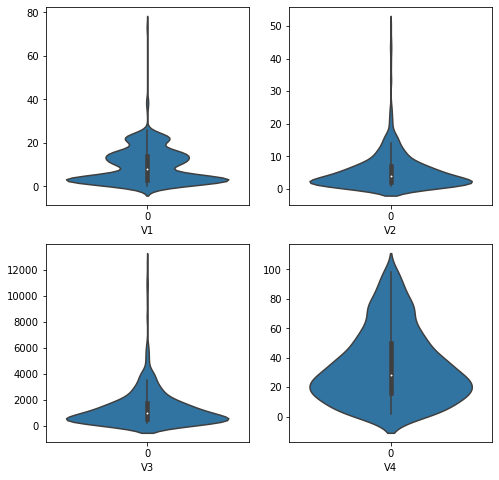

In [33]:
plt.figure(figsize=(8,8))
c=220
for i in X.columns[:-1]:
  plt.subplot(c+1)
  c+=1
  sns.violinplot(data=X[i].replace('?',np.nan).dropna())
  plt.xlabel(i)

In [30]:
for i in X.columns:
  print(i,len(X[i].unique()))

V1 32
V2 33
V3 33
V4 78
V5 1


Least no of outliers

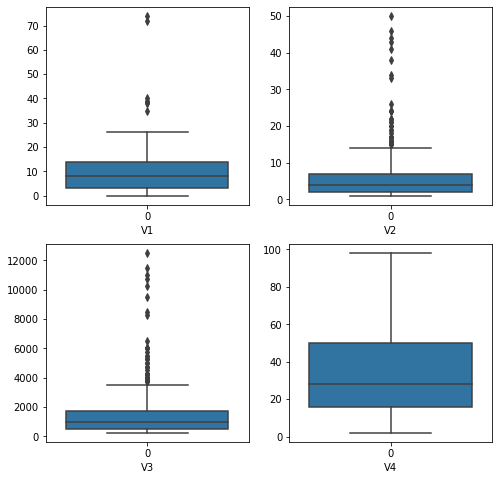

In [32]:
plt.figure(figsize=(8,8))
c=220
for i in X.columns[:-1]:
  plt.subplot(c+1)
  c+=1
  sns.boxplot(data=X[i].replace('?',np.nan).dropna())
  plt.xlabel(i)

# V4

Which is higher 'Yes' or 'no' or both are same?

In [35]:
y.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

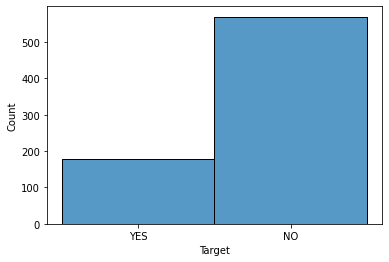

In [40]:
_=sns.histplot(y)

no of features have missing values

In [46]:
t = X.replace('?',np.NaN)
t.isnull().sum()

V1    5
V2    5
V3    0
V4    0
V5    0
dtype: int64

Average of V1 after applying SimpleImputer(strategy='median') 

In [66]:
s = ColumnTransformer(transformers=[('scale',SimpleImputer(strategy='median'),[0])])
X.V1 = X.V1.replace('?',np.nan)
s.fit_transform(X).mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


9.552139037433156

avg of 1st column after applyin KNNImputer(neighbors=3)

In [74]:
k = KNNImputer(n_neighbors=3)
X.V1 = X.V1.replace('?',np.nan)
X.V2 = X.V2.replace('?',np.nan)
k.fit_transform(pd.DataFrame(X.V1)).mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


9.562584118438762

2nd column average after applying simple imputer mean strategy

In [81]:
ct = ColumnTransformer(transformers=[('scale',SimpleImputer(strategy='mean'),[1])])
X.V2 = X.V2.replace('?',np.nan)
ct.fit_transform(X).mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


5.464333781965007

In [79]:
X

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,?,NaN,4000.0,35.0,NEGATIVE
3,?,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE
744,21.0,2.0,500.0,52.0,NEGATIVE
745,23.0,3.0,750.0,62.0,NEGATIVE
746,39.0,1.0,250.0,39.0,NEGATIVE


# SWI

1. import simpleimputer, take given matrix, impute based on mean and median, print new matrices after imputing

In [82]:
s_mean = SimpleImputer(strategy='mean')
s_median = SimpleImputer(strategy='median')
m = [[753,1622,3193],[np.nan,np.nan,1966],[1200,5,np.nan],[981,np.nan,9211]]

In [85]:
a = s_mean.fit_transform(m)

In [86]:
b = s_median.fit_transform(m)

In [87]:
a==b

array([[ True,  True,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True,  True,  True]])

In [88]:
print(a,b)

[[7.530e+02 1.622e+03 3.193e+03]
 [9.780e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 4.790e+03]
 [9.810e+02 8.135e+02 9.211e+03]] [[7.530e+02 1.622e+03 3.193e+03]
 [9.810e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 3.193e+03]
 [9.810e+02 8.135e+02 9.211e+03]]


2. Import FunctionTransformer from sklearn and apply log base 10 to the elements of [[0,1],[2,3],[10,100]]

In [89]:
from sklearn.preprocessing import FunctionTransformer
t = FunctionTransformer(np.log10)
x = [[0,1],[2,3],[10,100]]
t.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


array([[      -inf, 0.        ],
       [0.30103   , 0.47712125],
       [1.        , 2.        ]])

In [90]:
from sklearn.preprocessing import FunctionTransformer
t = FunctionTransformer(np.log10, validate=True)
x = [[0,1],[2,3],[10,100]]
t.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


array([[      -inf, 0.        ],
       [0.30103   , 0.47712125],
       [1.        , 2.        ]])

3.a. Read csv file from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

define columns

plot KDE [kernel density estimation]

plot box

plot violin

generate correlation

3.b. Generate a new feature matrix consisting of polynomial combinations of features with degree 2 and print shapes and data

In [121]:
#3.a.
import pandas as pd
d = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal length','sepal width','petal length','petal width','Iris-setosa'])
d

,sepal length,sepal width,petal length,petal width,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


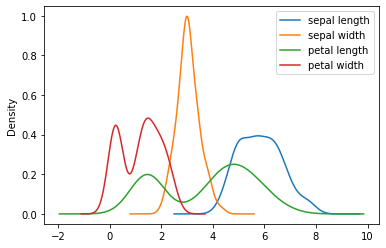

In [122]:
d.plot.kde()

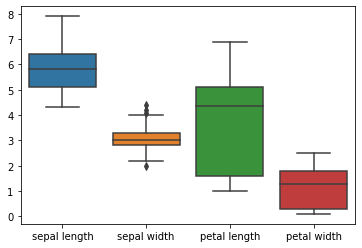

In [123]:
sns.boxplot(data=d)

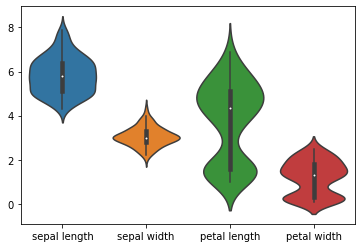

In [124]:
sns.violinplot(data=d, scale='width')

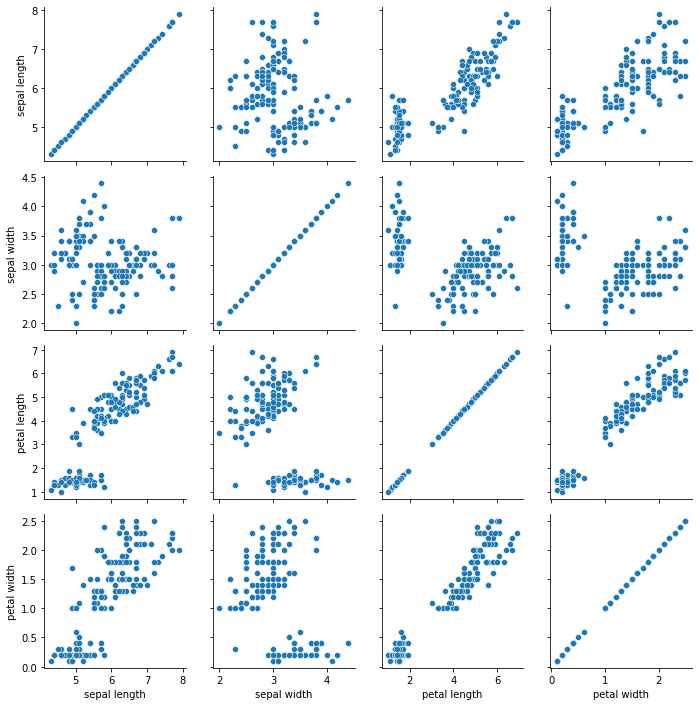

In [125]:
g = sns.PairGrid(d[d.columns[:4]])
g.map(sns.scatterplot)

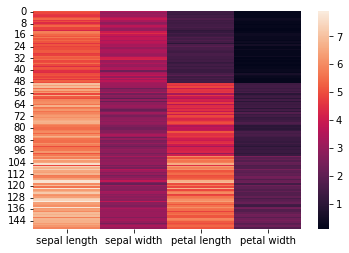

In [126]:
sns.heatmap(data=d[d.columns[:4]])

In [127]:
#Poly
print(d.shape)
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
p.fit_transform(d[d.columns[:4]]).shape

(150, 5)


(150, 15)

4. transform using onehotencoder 

In [128]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [129]:
ohe.fit_transform(pd.DataFrame(d[d.columns[-1]]))[45:55]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

5. 
* import housing dataset and selectpercentile, mutual_info_regression
* select top 10 percentile features
* print shape of matrix before and after transformation

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.feature_selection import SelectPercentile

In [2]:
X,y = fetch_california_housing(return_X_y=True)

In [3]:
print(X.shape,y.shape)
X = X[:1000,:]
y = y[:1000]
print(X.shape,y.shape)

(20640, 8) (20640,)
(1000, 8) (1000,)


In [5]:
t = SelectPercentile(mutual_info_regression, percentile=10)
t.fit_transform(X,y).shape

(1000, 1)

6. generate numeric pipeline
* a columntransformer named fantastic_4 with a block passthrough inside it
* a simpleimputer using mean
* a std scaler named std_scaler

generate categorical pipeline using LabelBinarizer on 5th feature

combine above two using feature union

In [6]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [22]:
num_pipeline = Pipeline([('selector',ColumnTransformer([('fantastic_4','passthrough',slice(0,4))])),
                 ('imputer',SimpleImputer(strategy='mean')),
                 ('std_scaler',StandardScaler()),])
cat_pipeline = ColumnTransformer([('label_binarizer',LabelBinarizer(),[4])])
full_pipeline = FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),('cat_pipeline',cat_pipeline)])
#full_piline.fit_transform(X,y)

In [23]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('fantastic_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer', SimpleImputer()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])